In [1]:
import  pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

import scipy.stats as stats

import pandas
from pandas import read_excel
from sklearn import preprocessing

import datetime
import math
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline
from sklearn import linear_model
# 用来设置间隔的
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

# 接下来用dff3 计算下  对比下

In [2]:
dff3=pd.read_excel('C:/Users/SZT/dff3.xls')  
# 这个是把雪季给更新了的  就是由一年到下一年

In [3]:
dff3

year        EA1         NA1        NH1         EA2         NA2  \
0   2000  76.648008  107.348712  86.600368  317.493652  298.576473   
1   2001  74.463955  103.723975  83.950106  316.677718  304.974953   
2   2002  79.559644   98.371907  85.713416  313.420986  305.277973   
3   2003  80.180934  106.452067  88.706866  318.262221  304.452147   
4   2004  76.139494  100.441504  84.046323  318.001423  304.958837   
5   2005  80.022710   98.858801  86.163888  319.924386  304.336098   
6   2006  73.702628  100.768727  82.494106  318.933011  307.022957   
7   2007  75.091569  105.652750  84.997212  319.706129  301.684416   
8   2008  78.040666  106.893667  87.412278  320.510970  303.514919   
9   2009  79.140048  100.346071  86.073629  318.553567  302.855747   
10  2010  74.942602  106.884748  85.307010  318.198206  303.418615   
11  2011  76.968441   96.859988  83.469432  318.965149  305.890190   
12  2012  78.072725  107.495648  87.604125  317.743695  303.880058   
13  2013  73.792626  103.121248  83.300566  319.284548  302.460200   
14  2014  74.402055   97.482754  81.914791  318.509421  303.485432   
15  2015  74.985862   99.290863  82.907060  318.642632  303.960864   
16  2016  77.626825  101.387757  85.357421  318.247492  305.797953   
17  2017  74.473414  105.432426  84.463755  319.231331  303.696618   
18  2018  74.698715  100.369983  83.054790  320.609287  300.186297   
19  2019  71.634424  105.898087  82.740526  318.827140  303.542814   

           NH2  Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
0   311.331402      124.154356      173.772240      140.268966  
1   312.858480      122.786238      163.749022      136.091626  
2   310.733187      131.138658      158.093933      139.980228  
3   313.761396      126.918713      166.999920      139.945470  
4   313.754077      123.138071      160.482667      135.292246  
5   314.854231      125.098324      159.522703      136.309657  
6   315.056193      119.769617      158.745770      132.437913  
7   313.854672      120.385440      168.968334      136.142540  
8   314.992654      122.529697      168.378748      137.419623  
9   313.447431      125.586481      162.490324      137.626198  
10  313.370472      121.744396      168.466133      136.936538  
11  314.700684      123.003292      155.969799      133.768748  
12  313.218539      125.329030      168.615590      139.385586  
13  313.843236      119.508078      165.661048      134.457330  
14  313.623418      120.892634      158.997322      133.291373  
15  313.861310      121.343230      160.329999      134.045749  
16  314.169350      124.379333      160.589803      136.188071  
17  314.184747      120.242082      166.735808      135.279008  
18  314.019594      119.089428      165.183686      134.035196  
19  313.846689      117.807284      167.355273      133.893837

In [4]:
dff3.corr(method='pearson') 

year       EA1       NA1       NH1       EA2       NA2  \
year            1.000000 -0.475839 -0.082797 -0.459602  0.466605 -0.057490   
EA1            -0.475839  1.000000 -0.105835  0.794388 -0.249461  0.131855   
NA1            -0.082797 -0.105835  1.000000  0.519881  0.112297 -0.383642   
NH1            -0.459602  0.794388  0.519881  1.000000 -0.145880 -0.122329   
EA2             0.466605 -0.249461  0.112297 -0.145880  1.000000 -0.254313   
NA2            -0.057490  0.131855 -0.383642 -0.122329 -0.254313  1.000000   
NH2             0.421832 -0.168785 -0.117651 -0.217775  0.826499  0.334140   
Snow_Length_EA -0.589105  0.881419 -0.135181  0.674685 -0.677281  0.224218   
Snow_Length_NA -0.039770 -0.135483  0.924707  0.448947  0.190916 -0.706308   
Snow_Length_NH -0.558069  0.710317  0.468124  0.896576 -0.491426 -0.249215   

                     NH2  Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
year            0.421832       -0.589105       -0.039770       -0.558069  
EA1            -0.168785        0.881419       -0.135483        0.710317  
NA1            -0.117651       -0.135181        0.924707        0.468124  
NH1            -0.217775        0.674685        0.448947        0.896576  
EA2             0.826499       -0.677281        0.190916       -0.491426  
NA2             0.334140        0.224218       -0.706308       -0.249215  
NH2             1.000000       -0.531362       -0.227926       -0.627512  
Snow_Length_EA -0.531362        1.000000       -0.196052        0.779355  
Snow_Length_NA -0.227926       -0.196052        1.000000        0.461578  
Snow_Length_NH -0.627512        0.779355        0.461578        1.000000

In [5]:
r,p = stats.pearsonr(dff3['NH1'],dff3['Snow_Length_NH'])  # 相关系数和P值
print('r，p',r,p)

r，p 0.8965757306036741 8.78740236456071e-08


a,b [-1.38856916] 564.9836503247733
a,b [-1.71341113] 684.3161012137416
a,b [-1.38285082] 569.9042658693571
a,b [1.16015401] 34.3044133515768
a,b [1.20630597] 40.123171521660524
a,b [1.12387568] 40.819533937457265


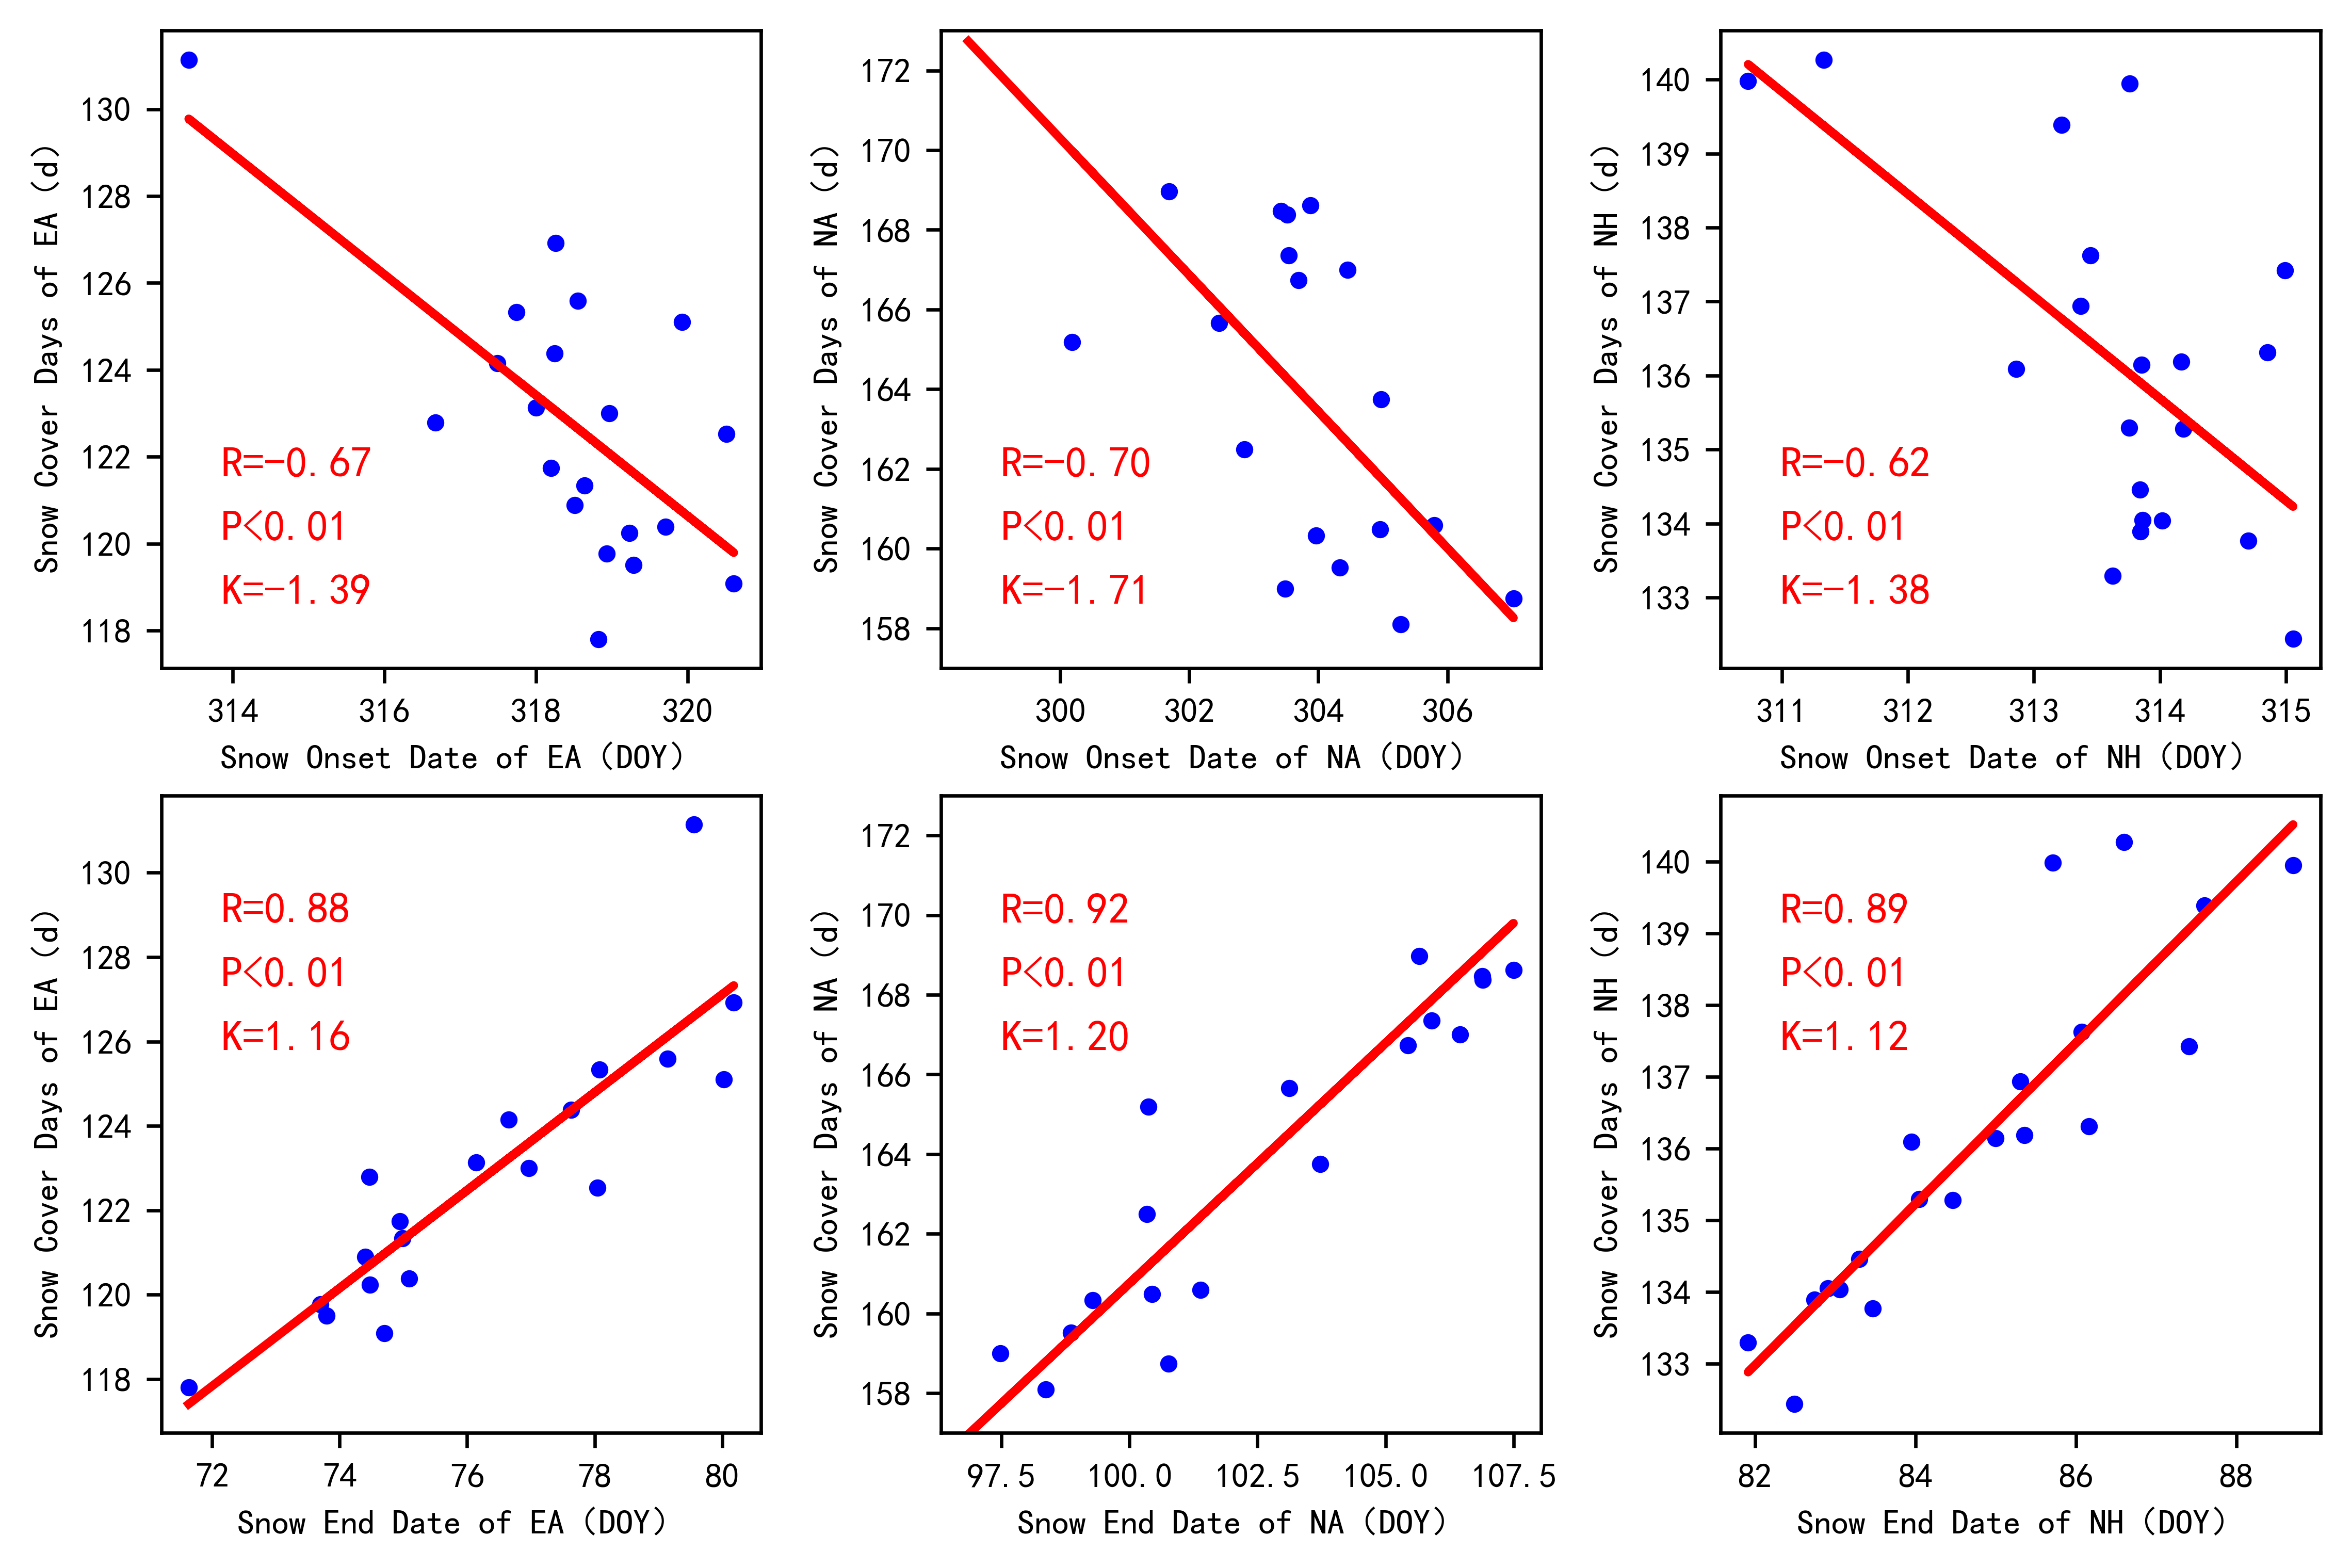

In [41]:
# plt.rc('font', family='STSong')
fig, ax = plt.subplots(2,3,dpi=600)
regr = linear_model.LinearRegression()  
# 子图1
ax[0,0].tick_params(labelsize=8)
ax[0,0].scatter(dff3['EA2'], dff3['Snow_Length_EA'],c='blue',marker='.')
plt.text(0.1,0.3,"R=-0.67", transform=ax[0,0].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.2,"P<0.01", transform=ax[0,0].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.1,"K=-1.39", transform=ax[0,0].transAxes,fontdict={'size': '10', 'color': 'r'})

regr.fit(dff3['EA2'].values.reshape(-1, 1), dff3['Snow_Length_EA']) # 注意此处.reshape(-1, 1)，因为X是一维的！
ax[0,0].plot(dff3['EA2'], regr.predict(dff3['EA2'].values.reshape(-1,1)), color='red', linewidth=2) 

# ax[0,0].set_ylabel('欧亚大陆积雪持续日数（d）',fontsize=8)
# ax[0,0].set_xlabel('欧亚大陆积雪开始日期（DOY）',fontsize=8)
ax[0,0].set_ylabel('Snow Cover Days of EA（d）',fontsize=8)
ax[0,0].set_xlabel('Snow Onset Date of EA（DOY）',fontsize=8)


a, b = regr.coef_, regr.intercept_ 
print('a,b',a,b)

# 子图2

ax[0,1].tick_params(labelsize=8)
ax[0,1].scatter(dff3['NA2'], dff3['Snow_Length_NA'], c='blue',marker='.')
plt.text(0.1,0.3,"R=-0.70", transform=ax[0,1].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.2,"P<0.01", transform=ax[0,1].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.1,"K=-1.71", transform=ax[0,1].transAxes,fontdict={'size': '10', 'color': 'r'})

regr.fit(dff3['NA2'].values.reshape(-1, 1), dff3['Snow_Length_NA']) # 注意此处.reshape(-1, 1)，因为X是一维的！
ax[0,1].plot(dff3['NA2'], regr.predict(dff3['NA2'].values.reshape(-1,1)), color='red', linewidth=2) 

ax[0,1].set_ylim([157, 173])  
# ax[0,1].set_ylabel('北美大陆积雪持续日数（d）',fontsize=8)
# ax[0,1].set_xlabel('北美大陆积雪开始日期（DOY）',fontsize=8)
ax[0,1].set_ylabel('Snow Cover Days of NA（d）',fontsize=8)
ax[0,1].set_xlabel('Snow Onset Date of NA（DOY）',fontsize=8)

a, b = regr.coef_, regr.intercept_ 
print('a,b',a,b)

# 子图3

ax[0,2].tick_params(labelsize=8)
ax[0,2].scatter(dff3['NH2'], dff3['Snow_Length_NH'], c='blue',marker='.')
plt.text(0.1,0.3,"R=-0.62", transform=ax[0,2].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.2,"P<0.01", transform=ax[0,2].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.1,"K=-1.38", transform=ax[0,2].transAxes,fontdict={'size': '10', 'color': 'r'})

regr.fit(dff3['NH2'].values.reshape(-1, 1), dff3['Snow_Length_NH']) # 注意此处.reshape(-1, 1)，因为X是一维的！
ax[0,2].plot(dff3['NH2'], regr.predict(dff3['NH2'].values.reshape(-1,1)), color='red', linewidth=2) 

# ax[0,2].set_ylabel('北半球积雪持续日数（d）',fontsize=8)
# ax[0,2].set_xlabel('北半球积雪开始日期（DOY）',fontsize=8)
ax[0,2].set_ylabel('Snow Cover Days of NH（d）',fontsize=8)
ax[0,2].set_xlabel('Snow Onset Date of NH（DOY）',fontsize=8)
a, b = regr.coef_, regr.intercept_ 
print('a,b',a,b)


# 子图4
ax[1,0].tick_params(labelsize=8)
ax[1,0].scatter(dff3['EA1'], dff3['Snow_Length_EA'], c='blue',marker='.')

plt.text(0.1,0.8,"R=0.88", transform=ax[1,0].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.7,"P<0.01", transform=ax[1,0].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.6,"K=1.16", transform=ax[1,0].transAxes,fontdict={'size': '10', 'color': 'r'})


regr.fit(dff3['EA1'].values.reshape(-1, 1), dff3['Snow_Length_EA']) # 注意此处.reshape(-1, 1)，因为X是一维的！
ax[1,0].plot(dff3['EA1'], regr.predict(dff3['EA1'].values.reshape(-1,1)), color='red', linewidth=2) 

# ax[1,0].set_ylabel('欧亚大陆积雪持续日数（d）',fontsize=8)
# ax[1,0].set_xlabel('欧亚大陆积雪结束日期（DOY）',fontsize=8)
ax[1,0].set_ylabel('Snow Cover Days of EA（d）',fontsize=8)
ax[1,0].set_xlabel('Snow End Date of EA（DOY）',fontsize=8)

a, b = regr.coef_, regr.intercept_ 
print('a,b',a,b)

# 子图5
ax[1,1].tick_params(labelsize=8)
ax[1,1].scatter(dff3['NA1'], dff3['Snow_Length_NA'], c='blue',marker='.')
ax[1,1].set_ylim([157, 173])  

plt.text(0.1,0.8,"R=0.92", transform=ax[1,1].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.7,"P<0.01", transform=ax[1,1].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.6,"K=1.20", transform=ax[1,1].transAxes,fontdict={'size': '10', 'color': 'r'})

regr.fit(dff3['NA1'].values.reshape(-1, 1), dff3['Snow_Length_NA']) # 注意此处.reshape(-1, 1)，因为X是一维的！
ax[1,1].plot(dff3['NA1'], regr.predict(dff3['NA1'].values.reshape(-1,1)), color='red', linewidth=2) 

# ax[1,1].set_ylabel('北美大陆积雪持续日数（d）',fontsize=8)
# ax[1,1].set_xlabel('北美大陆积雪结束日期（DOY）',fontsize=8)
ax[1,1].set_ylabel('Snow Cover Days of NA（d）',fontsize=8)
ax[1,1].set_xlabel('Snow End Date of NA（DOY）',fontsize=8)

a, b = regr.coef_, regr.intercept_ 
print('a,b',a,b)

# 子图6
ax[1,2].tick_params(labelsize=8)
ax[1,2].scatter(dff3['NH1'], dff3['Snow_Length_NH'], c='blue',marker='.')

plt.text(0.1,0.8,"R=0.89", transform=ax[1,2].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.7,"P<0.01", transform=ax[1,2].transAxes,fontdict={'size': '10', 'color': 'r'})
plt.text(0.1,0.6,"K=1.12", transform=ax[1,2].transAxes,fontdict={'size': '10', 'color': 'r'})


regr.fit(dff3['NH1'].values.reshape(-1, 1), dff3['Snow_Length_NH']) # 注意此处.reshape(-1, 1)，因为X是一维的！
ax[1,2].plot(dff3['NH1'], regr.predict(dff3['NH1'].values.reshape(-1,1)), color='red', linewidth=2) 

# ax[1,2].set_ylabel('北半球积雪持续日数（d）',fontsize=8)
# ax[1,2].set_xlabel('北半球积雪结束日期（DOY）',fontsize=8)
ax[1,2].set_ylabel('Snow Cover Days of NH（d）',fontsize=8)
ax[1,2].set_xlabel('Snow End Date of NH（DOY）',fontsize=8)

a, b = regr.coef_, regr.intercept_ 
print('a,b',a,b)


# 子图间距调整
plt.subplots_adjust(wspace=0.3)
plt.savefig("C:/Users/SZT/Desktop/论文/English first draft/figure/Corr.png",format='png',dpi=600)
plt.show()



In [7]:
#一元回归
fig=plt.figure(dpi=600)
# fig=plt.figure(dpi=600)
# regr = linear_model.LinearRegression()  
# # 拟合 
# regr.fit(dff3['NA1'].values.reshape(-1, 1), dff3['Snow_Length_NA']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# # 不难得到直线的斜率、截距 
# a, b = regr.coef_, regr.intercept_ 
# print(a)
# print(b)
# plt.plot(dff3['EA2'], regr.predict(dff3['Snow_Length_EA'].values.reshape(-1,1)), color='red', linewidth=4) 
# plt.text(0.32,0.52,"r=1", transform=plt.transAxes,fontdict={'size': '14', 'color': 'r'})

plt.subplot(231)
plt.ylabel('欧亚大陆积雪持续日数（d）',fontsize=8)
plt.xlabel('欧亚大陆积雪开始日期（DOY）',fontsize=8)
plt.tick_params(labelsize=8)
plt.text(-0.03,0.52,"r=", fontdict={'size': '14', 'color': 'r'})
plt.scatter(dff3['EA2'], dff3['Snow_Length_EA'], color='blue')

plt.subplot(232)
plt.ylabel('北美大陆积雪持续日数（d）',fontsize=8)
plt.xlabel('北美大陆积雪开始日期（DOY）',fontsize=8)
plt.tick_params(labelsize=8)
plt.text(0.32,0.52,"r=1", fontdict={'size': '14', 'color': 'r'})
plt.scatter(dff3['NA2'], dff3['Snow_Length_NA'], color='blue')  

plt.subplot(233)
plt.ylabel('北半球积雪持续日数（d）',fontsize=8)
plt.xlabel('北半球积雪开始日期（DOY）',fontsize=8)
plt.tick_params(labelsize=8)
plt.text(0.682,0.52,"r=2", fontdict={'size': '14', 'color': 'r'})
plt.scatter(dff3['NH2'], dff3['Snow_Length_NH'], color='blue')


plt.subplot(234)
plt.ylabel('欧亚大陆积雪持续日数（d）',fontsize=8)
plt.xlabel('欧亚大陆积雪结束日期（DOY）',fontsize=8)
plt.tick_params(labelsize=8)
plt.text(-0.03,0.30,"r=4", fontdict={'size': '14', 'color': 'r'})
plt.scatter(dff3['EA1'], dff3['Snow_Length_EA'], color='blue')  

plt.subplot(235)
plt.text(0.32,0.30,"r=5", fontdict={'size': '14', 'color': 'r'})
plt.ylabel('北美大陆积雪持续日数（d）',fontsize=8)
plt.xlabel('北美大陆积雪结束日期（DOY）',fontsize=8)
plt.tick_params(labelsize=8)
plt.scatter(dff3['NA1'], dff3['Snow_Length_NA'], color='blue')  

plt.subplot(236)
plt.text(0.682,0.30,"r=6",fontdict={'size': '14', 'color': 'r'})
plt.ylabel('北半球积雪持续日数（d）',fontsize=8)
plt.xlabel('北半球积雪结束日期（DOY）',fontsize=8)
plt.tick_params(labelsize=8)
plt.scatter(dff3['NH1'], dff3['Snow_Length_NH'], color='blue') 


# # 2.拟合的直线 
# plt.plot(dff3['NH2'], regr.predict(dff3['NH2'].values.reshape(-1,1)), color='red', linewidth=4) 

# 95置信带
# sns.pairplot(dfz, x_vars=['EA1'], y_vars='Snow_Length_EA', size=7, aspect=0.8,kind = 'reg')
plt.subplots_adjust(wspace=0.3)
plt.show()


# r,p = stats.pearsonr(dff3['EA1'],dff3['Snow_Length_EA'])  # 相关系数和P值
# print(r,p)

In [8]:
dff3.describe()

year        EA1         NA1        NH1         EA2         NA2  \
count    20.00000  20.000000   20.000000  20.000000   20.000000   20.000000   
mean   2009.50000  76.229367  102.654084  84.813883  318.487148  303.698678   
std       5.91608   2.392341    3.622587   1.892445    1.535882    1.948071   
min    2000.00000  71.634424   96.859988  81.914791  313.420986  298.576473   
25%    2004.75000  74.471049  100.082269  83.239122  318.149010  303.277898   
50%    2009.50000  75.615532  102.254503  84.730484  318.598099  303.788338   
75%    2014.25000  78.048681  106.036582  86.096194  319.244636  304.962866   
max    2019.00000  80.180934  107.495648  88.706866  320.609287  307.022957   

              NH2  Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
count   20.000000       20.000000       20.000000       20.000000  
mean   313.674088      122.742219      163.955406      136.139795  
std      1.076469        3.148881        4.725767        2.372218  
min    310.733187      117.807284      155.969799      132.437913  
25%    313.428191      120.349600      160.128175      134.043111  
50%    313.844962      122.657967      164.466354      136.117083  
75%    314.173199      124.559081      167.611141      137.471267  
max    315.056193      131.138658      173.772240      140.268966

In [9]:
dff3.mean()

year              2009.500000
EA1                 76.229367
NA1                102.654084
NH1                 84.813883
EA2                318.487148
NA2                303.698678
NH2                313.674088
Snow_Length_EA     122.742219
Snow_Length_NA     163.955406
Snow_Length_NH     136.139795
dtype: float64

### 趋势

[-0.22377323]
585.8121052966169


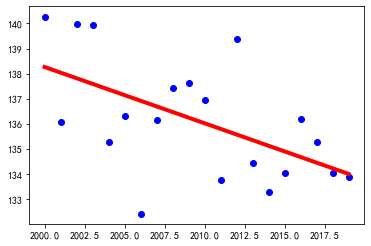

In [10]:
regr = linear_model.LinearRegression()  
# 拟合 
regr.fit(dff3['year'].values.reshape(-1, 1), dff3['Snow_Length_NH']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# 不难得到直线的斜率、截距 
a, b = regr.coef_, regr.intercept_ 
print(a)
print(b)
plt.scatter(dff3['year'], dff3['Snow_Length_NH'], color='blue')  
# 2.拟合的直线 
plt.plot(dff3['year'], regr.predict(dff3['year'].values.reshape(-1,1)), color='red', linewidth=4) 
plt.show()

FS  Do 变化趋势不太明显   总体呈现降雪初始日期 延后  雪季缩短
 EA  0.12113613
 NA -0.01893056
 NH  0.07675503




FNS De 降雪终止日期 都是下降的  也就是提前了 雪季缩短
 EA -0.19241972
 NA -0.05069902
 NH -0.1470182




SL  Dd 雪季整体 下降
 EA -0.31355585 
 NA -0.03176846
 NH -0.22377323

EA 
NA 降雪初始日期略有提前
NH  雪季缩短


###  最新  的  这个 斜率  以这个为准   但是具体到多少天还要再乘以20年

### mk
1是x轴不是年份 
2是感觉不太准
3 是数据对不准年份呢 

In [11]:
# https://blog.csdn.net/u012111465/article/details/82016992?utm_medium=distribute.pc_relevant.none-task-blog-baidujs_title-3&spm=1001.2101.3001.4242
# Z的绝对值在大于等于1.28、1、64和2.32时，分别表示通过了信度90%，95%，99%的显著性检验。
# Mann-Kendall突变点检测
# 数据序列y
# 结果序列UF，UB
#--------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def Kendall_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    n=inputdata.shape[0]
    # 正序列计算---------------------------------
    # 定义累计量序列Sk，初始值=0
    Sk             = [0]
    # 定义统计量UFk，初始值 =0
    UFk            = [0]
    # 定义Sk序列元素s，初始值 =0
    s              =  0
    Exp_value      = [0]
    Var_value      = [0]
    # i从1开始，因为根据统计量UFk公式，i=0时，Sk(0)、E(0)、Var(0)均为0  就是这里   是从1 开始 的
    # 此时UFk无意义，因此公式中，令UFk(0)=0
    for i in range(1,n):
        for j in range(i):
            if inputdata[i] > inputdata[j]:
                s = s+1
            else:
                s = s+0
        Sk.append(s)
        Exp_value.append((i+1)*(i+2)/4 ) 
        #Exp_value.append((i+1)*i/4 )                     # Sk[i]的均值
        Var_value.append((i+1)*i*(2*(i+1)+5)/72 )            # Sk[i]的方差   这个和matlab  的差别就是 i从0 还是i从1开始
        UFk.append((Sk[i]-Exp_value[i])/np.sqrt(Var_value[i]))
    # ------------------------------正序列计算
    # 逆序列计算---------------------------------
    # 定义逆序累计量序列Sk2，长度与inputdata一致，初始值=0
    Sk2             = [0]
    # 定义逆序统计量UBk，长度与inputdata一致，初始值=0
    UBk             = [0]
    UBk2            = [0]
    # s归0
    s2              =  0
    Exp_value2      = [0]
    Var_value2      = [0]
    # 按时间序列逆转样本y
    inputdataT = list(reversed(inputdata))
    # i从2开始，因为根据统计量UBk公式，i=1时，Sk2(1)、E(1)、Var(1)均为0
    # 此时UBk无意义，因此公式中，令UBk(1)=0
    for i in range(1,n):
        for j in range(i):
            if inputdataT[i] > inputdataT[j]:
                s2 = s2+1
            else:
                s2 = s2+0
        Sk2.append(s2)
        #Exp_value.append((i+1)*i/4 )   
        Exp_value2.append((i+1)*(i+2)/4 )                     # Sk[i]的均值
        Var_value2.append((i+1)*i*(2*(i+1)+5)/72 )            # Sk[i]的方差
        UBk.append((Sk2[i]-Exp_value2[i])/np.sqrt(Var_value2[i]))   
        UBk2.append(-UBk[i])

    UBkT = list(reversed(UBk2))
    diff = np.array(UFk) - np.array(UBkT)
    K    = list()
    # 找出交叉点
    for k in range(1,n):
        if diff[k-1]*diff[k]<0:
            K.append(k)
    # 做突变检测图时，使用UFk和UBkT
#     plt.figure(figsize=(6,4),dpi=600)
    plt.figure(figsize=(6,4))
#     plt.title('MK trend')

    plt.plot(range(1,n+1) ,UFk  ,label='UF') # UFk
    plt.plot(range(1,n+1) ,UBkT ,label='UB') # UBk
#     plt.plot(range(1,n+1) ,UBkT ,label='UB') # UBk

    plt.ylabel('统计量')
    plt.xlabel('年')
    
    x_lim = plt.xlim()
#     x_lim = plt.xlim(2000,2019)
   # 其实可以没有颜色  那样的话 就可以只用。。。。。。。。。了
    print('就是x轴的刻度',x_lim)
    plt.plot(x_lim,[-1.96,-1.96],'m--',color='r',label='0.05 显著水平')    #   双边检测是1.96  单边检测 1.64  0.05  95% 
    plt.plot(x_lim,[  0  ,  0  ],'m--',color='g')
    plt.plot(x_lim,[+1.96,+1.96],'m--',color='r')
    plt.legend(loc="best",fontsize=6)  # 图例放到最佳位置
#     plt.legend(loc=2) # 图例
#     plt.xlim(2000,2020)
#     new_ticks = np.linspace(2000,2019,5)
#     plt.xticks(new_ticks)
    plt.show()
    return K

#  plt.legend(loc='String or Number', bbox_to_anchor=(num1, num2)) # 还可以微调图例的位置 

# 都是00-19  20年的时间
eafn=dff3['EA1']
eaf=dff3['EA2']

nafn=dff3['NA1']
naf=dff3['NA2']

nhfn=dff3['NH1']
nhf=dff3['NH2']

slea=dff3['Snow_Length_EA']
slna=dff3['Snow_Length_NA']
slnh=dff3['Snow_Length_NH']

In [12]:
def Pettitt_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    n   = inputdata.shape[0]
    k = range(n)
    inputdataT = pd.Series(inputdata)
    r = inputdataT.rank()
    Uk = [2*np.sum(r[0:x])-x*(n + 1) for x in k]
    Uka = list(np.abs(Uk))
    U = np.max(Uka)
    K = Uka.index(U)
    pvalue         = 2 * np.exp((-6 * (U**2))/(n**3 + n**2))
    if pvalue <= 0.05:
        change_point_desc = '显著'
    else:
        change_point_desc = '不显著'
    Pettitt_result = {'突变点位置':K,'突变程度':change_point_desc}
    return K ,Pettitt_result

def Buishand_U_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    inputdata_mean = np.mean(inputdata)
    n  = inputdata.shape[0]
    k = range(n)
    Sk = [np.sum(inputdata[0:x+1] - inputdata_mean) for x in k]
    sigma = np.sqrt(np.sum((inputdata-np.mean(inputdata))**2)/(n-1))
    U = np.sum((Sk[0:(n - 2)]/sigma)**2)/(n * (n + 1))
    Ska = np.abs(Sk)
    S = np.max(Ska)
    K = list(Ska).index(S) + 1
    Skk = (Sk/sigma)
    return K

def SNHT_change_point_detection(inputdata):
    inputdata = np.array(inputdata)
    inputdata_mean = np.mean(inputdata)
    n  = inputdata.shape[0]
    k = range(1,n)
    sigma = np.sqrt(np.sum((inputdata-np.mean(inputdata))**2)/(n-1))
    Tk = [x*(np.sum((inputdata[0:x]-inputdata_mean)/sigma)/x)**2 + (n-x)*(np.sum((inputdata[x:n]-inputdata_mean)/sigma)/(n-x))**2 for x in k]
    T = np.max(Tk)
    K = list(Tk).index(T) + 1
    return K


就是x轴的刻度 (0.04999999999999993, 20.95)


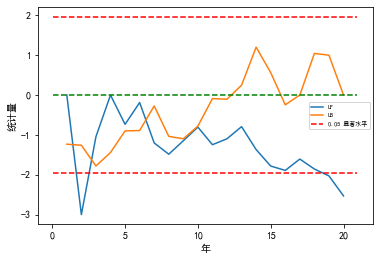

Mann-Kendall: [1, 2, 6]
Pettitt: (13, {'突变点位置': 13, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 13
就是x轴的刻度 (0.04999999999999993, 20.95)


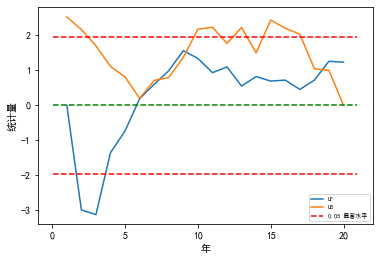

Mann-Kendall: [7, 9, 18]
Pettitt: (5, {'突变点位置': 5, '突变程度': '不显著'})
Buishand U Test: 5
Standard Normal Homogeneity Test (SNHT): 3


In [13]:
#EA 的2个日期的突变
print("Mann-Kendall:",Kendall_change_point_detection(eafn))
print("Pettitt:",Pettitt_change_point_detection(eafn))
print("Buishand U Test:",Buishand_U_change_point_detection(eafn))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(eafn))

print("Mann-Kendall:",Kendall_change_point_detection(eaf))
print("Pettitt:",Pettitt_change_point_detection(eaf))
print("Buishand U Test:",Buishand_U_change_point_detection(eaf))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(eaf))


就是x轴的刻度 (0.04999999999999993, 20.95)


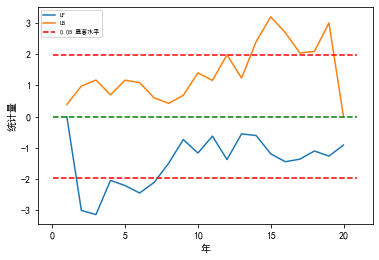

Mann-Kendall: []
Pettitt: (14, {'突变点位置': 14, '突变程度': '不显著'})
Buishand U Test: 11
Standard Normal Homogeneity Test (SNHT): 1
就是x轴的刻度 (0.04999999999999993, 20.95)


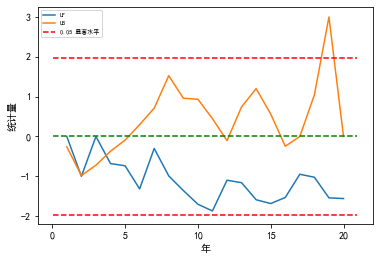

Mann-Kendall: [1, 2, 3]
Pettitt: (7, {'突变点位置': 7, '突变程度': '不显著'})
Buishand U Test: 1
Standard Normal Homogeneity Test (SNHT): 1


In [14]:
#NA 的2个日期的突变
print("Mann-Kendall:",Kendall_change_point_detection(nafn))
print("Pettitt:",Pettitt_change_point_detection(nafn))
print("Buishand U Test:",Buishand_U_change_point_detection(nafn))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(nafn))

print("Mann-Kendall:",Kendall_change_point_detection(naf))
print("Pettitt:",Pettitt_change_point_detection(naf))
print("Buishand U Test:",Buishand_U_change_point_detection(naf))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(naf))

就是x轴的刻度 (0.04999999999999993, 20.95)


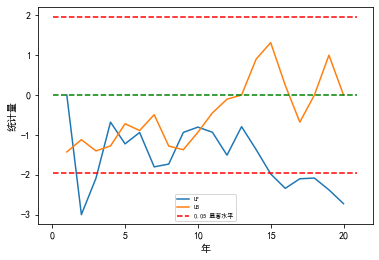

Mann-Kendall: [1, 3, 4, 8, 10]
Pettitt: (13, {'突变点位置': 13, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 13
就是x轴的刻度 (0.04999999999999993, 20.95)


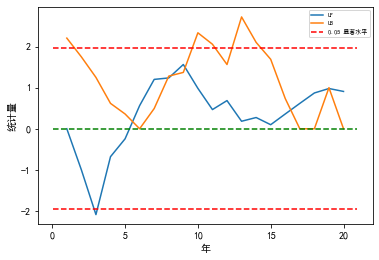

Mann-Kendall: [5, 7, 8, 9, 16, 18, 19]
Pettitt: (5, {'突变点位置': 5, '突变程度': '不显著'})
Buishand U Test: 3
Standard Normal Homogeneity Test (SNHT): 3


In [15]:
#NH 的2个日期的突变
print("Mann-Kendall:",Kendall_change_point_detection(nhfn))
print("Pettitt:",Pettitt_change_point_detection(nhfn))
print("Buishand U Test:",Buishand_U_change_point_detection(nhfn))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(nhfn))

print("Mann-Kendall:",Kendall_change_point_detection(nhf))
print("Pettitt:",Pettitt_change_point_detection(nhf))
print("Buishand U Test:",Buishand_U_change_point_detection(nhf))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(nhf))


就是x轴的刻度 (0.04999999999999993, 20.95)


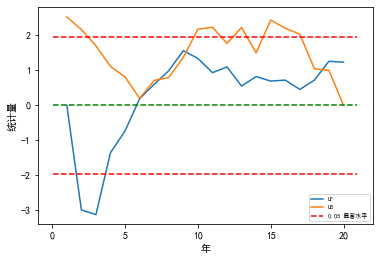

Mann-Kendall: [7, 9, 18]
Pettitt: (5, {'突变点位置': 5, '突变程度': '不显著'})
Buishand U Test: 5
Standard Normal Homogeneity Test (SNHT): 3
就是x轴的刻度 (0.04999999999999993, 20.95)


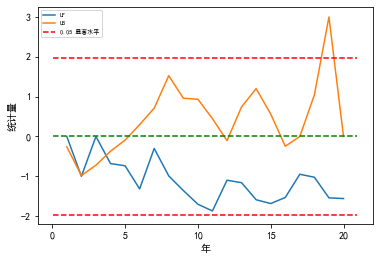

Mann-Kendall: [1, 2, 3]
Pettitt: (7, {'突变点位置': 7, '突变程度': '不显著'})
Buishand U Test: 1
Standard Normal Homogeneity Test (SNHT): 1
就是x轴的刻度 (0.04999999999999993, 20.95)


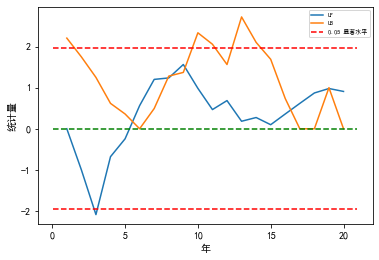

Mann-Kendall: [5, 7, 8, 9, 16, 18, 19]
Pettitt: (5, {'突变点位置': 5, '突变程度': '不显著'})
Buishand U Test: 3
Standard Normal Homogeneity Test (SNHT): 3


In [16]:
#Do的3个地区的突变
print("Mann-Kendall:",Kendall_change_point_detection(eaf))
print("Pettitt:",Pettitt_change_point_detection(eaf))
print("Buishand U Test:",Buishand_U_change_point_detection(eaf))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(eaf))

print("Mann-Kendall:",Kendall_change_point_detection(naf))
print("Pettitt:",Pettitt_change_point_detection(naf))
print("Buishand U Test:",Buishand_U_change_point_detection(naf))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(naf))

print("Mann-Kendall:",Kendall_change_point_detection(nhf))
print("Pettitt:",Pettitt_change_point_detection(nhf))
print("Buishand U Test:",Buishand_U_change_point_detection(nhf))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(nhf))

Do

EA 先下降 再上升   2005年

NA 一直下降

NH  下降 上升   2005年


### Do 的三个地区
UF  大于0 为上升  小于0为下降
所以找UF 和0 的交点 还算有点可行性
而且 UF 超出 2的这条线的话 那么就是显著性的增长了  
所以说 目前是只能用mk 的这种了  和moving t 一样的  不能考虑交点了啊
还要结合moving t  但是moving t 主观性太强了啊

##  结合 moving  t test 还可以找到突变点  做出一个新的表格来
### 还有MK的z值是啥意思呢

就是x轴的刻度 (0.04999999999999993, 20.95)


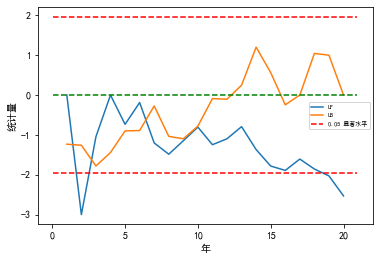

Mann-Kendall: [1, 2, 6]
Pettitt: (13, {'突变点位置': 13, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 13
就是x轴的刻度 (0.04999999999999993, 20.95)


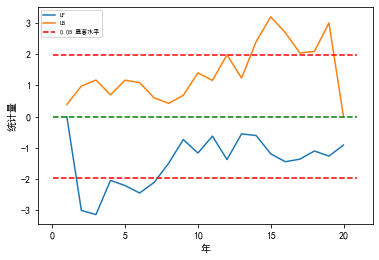

Mann-Kendall: []
Pettitt: (14, {'突变点位置': 14, '突变程度': '不显著'})
Buishand U Test: 11
Standard Normal Homogeneity Test (SNHT): 1
就是x轴的刻度 (0.04999999999999993, 20.95)


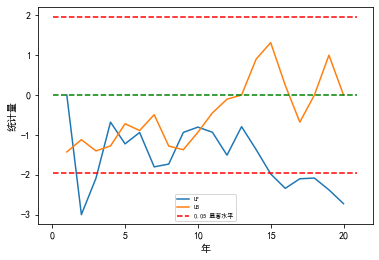

Mann-Kendall: [1, 3, 4, 8, 10]
Pettitt: (13, {'突变点位置': 13, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 13


In [17]:
#De的3个地区的突变
print("Mann-Kendall:",Kendall_change_point_detection(eafn))
print("Pettitt:",Pettitt_change_point_detection(eafn))
print("Buishand U Test:",Buishand_U_change_point_detection(eafn))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(eafn))

print("Mann-Kendall:",Kendall_change_point_detection(nafn))
print("Pettitt:",Pettitt_change_point_detection(nafn))
print("Buishand U Test:",Buishand_U_change_point_detection(nafn))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(nafn))

print("Mann-Kendall:",Kendall_change_point_detection(nhfn))
print("Pettitt:",Pettitt_change_point_detection(nhfn))
print("Buishand U Test:",Buishand_U_change_point_detection(nhfn))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(nhfn))

De

EA 一直下降  

NA 一直下降

NH  一直下降   


就是x轴的刻度 (0.04999999999999993, 20.95)


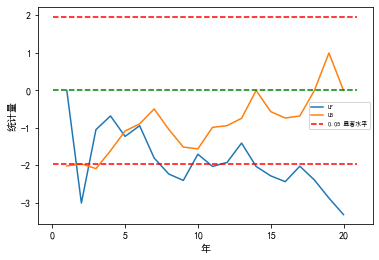

Mann-Kendall: [1, 2, 4]
Pettitt: (13, {'突变点位置': 13, '突变程度': '不显著'})
Buishand U Test: 6
Standard Normal Homogeneity Test (SNHT): 6
就是x轴的刻度 (0.04999999999999993, 20.95)


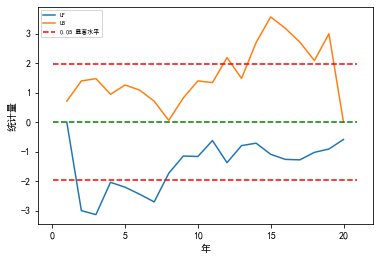

Mann-Kendall: []
Pettitt: (7, {'突变点位置': 7, '突变程度': '不显著'})
Buishand U Test: 1
Standard Normal Homogeneity Test (SNHT): 1
就是x轴的刻度 (0.04999999999999993, 20.95)


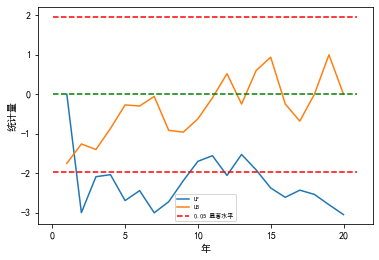

Mann-Kendall: [1]
Pettitt: (11, {'突变点位置': 11, '突变程度': '不显著'})
Buishand U Test: 13
Standard Normal Homogeneity Test (SNHT): 4


In [18]:
#SL 的3个地区的突变
print("Mann-Kendall:",Kendall_change_point_detection(slea))
print("Pettitt:",Pettitt_change_point_detection(slea))
print("Buishand U Test:",Buishand_U_change_point_detection(slea))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(slea))

print("Mann-Kendall:",Kendall_change_point_detection(slna))
print("Pettitt:",Pettitt_change_point_detection(slna))
print("Buishand U Test:",Buishand_U_change_point_detection(slna))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(slna))

print("Mann-Kendall:",Kendall_change_point_detection(slnh))
print("Pettitt:",Pettitt_change_point_detection(slnh))
print("Buishand U Test:",Buishand_U_change_point_detection(slnh))
print("Standard Normal Homogeneity Test (SNHT):",SNHT_change_point_detection(slnh))

Sl

EA 一直下降  

NA 一直下降

NH  一直下降   


### 滑动T 检验
https://blog.csdn.net/qq_41898946/article/details/113981194

这一方法的缺点是子序列长度的选择带有人为性。为避免任意选择子序列长度造成的突变点的漂移，具体使用这一方法时可以反复变动子序列长度进行试验比较，提高计算结果的可靠性。


### 先贡献 再相关

In [19]:
dff3.corr(method='pearson')   # 'pearson', 'kendall' ->  针对的是分类的数据 , 'spearman'
# stats.pearsonr(dff3['EA1'],dff3['NH1'])  #计算p值的 

year       EA1       NA1       NH1       EA2       NA2  \
year            1.000000 -0.475839 -0.082797 -0.459602  0.466605 -0.057490   
EA1            -0.475839  1.000000 -0.105835  0.794388 -0.249461  0.131855   
NA1            -0.082797 -0.105835  1.000000  0.519881  0.112297 -0.383642   
NH1            -0.459602  0.794388  0.519881  1.000000 -0.145880 -0.122329   
EA2             0.466605 -0.249461  0.112297 -0.145880  1.000000 -0.254313   
NA2            -0.057490  0.131855 -0.383642 -0.122329 -0.254313  1.000000   
NH2             0.421832 -0.168785 -0.117651 -0.217775  0.826499  0.334140   
Snow_Length_EA -0.589105  0.881419 -0.135181  0.674685 -0.677281  0.224218   
Snow_Length_NA -0.039770 -0.135483  0.924707  0.448947  0.190916 -0.706308   
Snow_Length_NH -0.558069  0.710317  0.468124  0.896576 -0.491426 -0.249215   

                     NH2  Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
year            0.421832       -0.589105       -0.039770       -0.558069  
EA1            -0.168785        0.881419       -0.135483        0.710317  
NA1            -0.117651       -0.135181        0.924707        0.468124  
NH1            -0.217775        0.674685        0.448947        0.896576  
EA2             0.826499       -0.677281        0.190916       -0.491426  
NA2             0.334140        0.224218       -0.706308       -0.249215  
NH2             1.000000       -0.531362       -0.227926       -0.627512  
Snow_Length_EA -0.531362        1.000000       -0.196052        0.779355  
Snow_Length_NA -0.227926       -0.196052        1.000000        0.461578  
Snow_Length_NH -0.627512        0.779355        0.461578        1.000000

In [20]:
# 对dff3
# dff3z-score

values3 = dff3.values #dataframe转换为array
values3 = values3.astype('float32') #定义数据类型

# data = preprocessing.StandardScaler(values)                                            # 标准化
data3 = preprocessing.scale(values3)   
dff3z=pandas.DataFrame(data3) #将array还原为dataframe

dff3z.columns=dff3.columns #命名标题行
dff3z
dff3z.to_csv( 'CCC.csv' ,index=None)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [21]:
stats.pearsonr(dff3z['EA1'],dff3z['NH1'])   # p值越小，表示相关系数越显著，一般p值在500个样本以上时有较高的可靠性。

(0.7943880074163572, 2.8772143009984976e-05)

In [22]:
dff3z.corr()

year       EA1       NA1       NH1       EA2       NA2  \
year            1.000000 -0.475840 -0.082797 -0.459602  0.466608 -0.057489   
EA1            -0.475840  1.000000 -0.105835  0.794388 -0.249464  0.131855   
NA1            -0.082797 -0.105835  1.000000  0.519881  0.112294 -0.383642   
NH1            -0.459602  0.794388  0.519881  1.000000 -0.145884 -0.122330   
EA2             0.466608 -0.249464  0.112294 -0.145884  1.000000 -0.254313   
NA2            -0.057489  0.131855 -0.383642 -0.122330 -0.254313  1.000000   
NH2             0.421832 -0.168788 -0.117650 -0.217777  0.826499  0.334140   
Snow_Length_EA -0.589105  0.881420 -0.135181  0.674685 -0.677283  0.224218   
Snow_Length_NA -0.039770 -0.135483  0.924706  0.448947  0.190914 -0.706309   
Snow_Length_NH -0.558069  0.710317  0.468125  0.896576 -0.491429 -0.249216   

                     NH2  Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
year            0.421832       -0.589105       -0.039770       -0.558069  
EA1            -0.168788        0.881420       -0.135483        0.710317  
NA1            -0.117650       -0.135181        0.924706        0.468125  
NH1            -0.217777        0.674685        0.448947        0.896576  
EA2             0.826499       -0.677283        0.190914       -0.491429  
NA2             0.334140        0.224218       -0.706309       -0.249216  
NH2             1.000000       -0.531364       -0.227926       -0.627514  
Snow_Length_EA -0.531364        1.000000       -0.196052        0.779354  
Snow_Length_NA -0.227926       -0.196052        1.000000        0.461578  
Snow_Length_NH -0.627514        0.779354        0.461578        1.000000

这个好像没啥意义吧 只是对标准化的序列进行了这个corr

[-0.6275139]
2.016152e-08


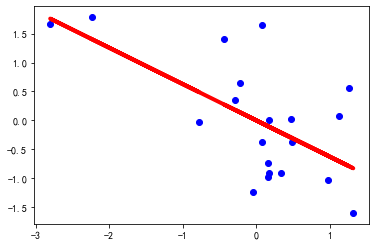

In [23]:
#一元回归
regr = linear_model.LinearRegression()  
# 拟合 
regr.fit(dff3z['NH2'].values.reshape(-1, 1), dff3z['Snow_Length_NH']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# 不难得到直线的斜率、截距 
a, b = regr.coef_, regr.intercept_ 
print(a)
print(b)
plt.scatter(dff3z['NH2'], dff3z['Snow_Length_NH'], color='blue')  
# 2.拟合的直线 
plt.plot(dff3z['NH2'], regr.predict(dff3z['NH2'].values.reshape(-1,1)), color='red', linewidth=4) 

# 95置信带
# sns.pairplot(dfz, x_vars=['EA1'], y_vars='Snow_Length_EA', size=7, aspect=0.8,kind = 'reg')
plt.show()

In [24]:
# 二元回归
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
X=dff3z[['NH1','NH2']]
y=dff3z['Snow_Length_NH']
linreg = LinearRegression()
model=linreg.fit(X, y)
print (model)
print (linreg.intercept_)
print ('二元回归系数',linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
2.1809928e-08
二元回归系数 [ 0.7977527  -0.45378202]


In [25]:
#作图



# 原数据的相关关系 默认pearson   另外计算p值 
De
EA1 NH1    0.794388    √
NA1 NH1   0.519881
Do
EA2 NH2   0.826499      √
NA2 NH2   0.334140
Sl
Snow_Length_EA  Snow_Length_NH     0.779355     √
Snow_Length_NA  Snow_Length_NH     0.461578
/////////////////////////////////////////////////////////
EA     
De FNS->Dd SL   0.881419
Do FS->Dd SL    -0.677281	
NA  
De FNS->Dd SL 	 0.924707
Do FS->Dd SL     -0.706308	
NH 总体Do De Dd 之间的关系    
De FNS->Dd SL   0.896576
Do FS->Dd SL    -0.627512
# z-score 后的相关关系corr
De
EA1 NH1    0.794388   √
NA1 NH1   0.519881
Do
EA2 NH2  0.826499     √
NA2 NH2  0.334140
Sl
Snow_Length_EA  Snow_Length_NH   0.779354      √
Snow_Length_NA  Snow_Length_NH   0.461578 
/////////////////////////////////////////////////////////
EA     
De FNS->Dd SL  0.881420
Do FS->Dd SL   -0.677283	
NA  
De FNS->Dd SL 	 0.924706
Do FS->Dd SL    -0.706309	
NH 总体Do De Dd 之间的关系    
De FNS->Dd SL   0.896576
Do FS->Dd SL  -0.627514
# 一元回归
De
EA1 NH1    0.7943881          √
NA1 NH1  0.51988065
Do
EA2 NH2  0.8264986            √
NA2 NH2  0.33414024
Sl
Snow_Length_EA  Snow_Length_NH    0.77935386    √
Snow_Length_NA  Snow_Length_NH    0.46157846
/////////////////////////////////////////////////////////
EA     
De FNS->Dd SL  0.88141984
Do FS->Dd SL   -0.6772834
NA  
De FNS->Dd SL 	 0.9247065
Do FS->Dd SL    -0.70630836
NH 总体Do De Dd 之间的关系    
De FNS->Dd SL   0.896576
Do FS->Dd SL  -0.6275139
# 二元回归
De   
EA1 NH1  0.8590322  
NA1 NH1  0.61079663
Do    
EA2 NH2  0.9745008
NA2 NH2  0.58196855
Sl    
Snow_Length_EA  Snow_Length_NH    0.9046178
Snow_Length_NA  Snow_Length_NH    0.63893086
/////////////////////////////////////////////////////////
EA     
De FNS->Dd SL   0.75974244
Do FS->Dd SL   -0.48775503
NA     
De FNS->Dd SL 	 0.76655984
Do FS->Dd SL    -0.41222376
NH 总体Do De Dd 之间的关系      
De FNS->Dd SL   0.7977527
Do FS->Dd SL    -0.45378202 

# 先贡献后相关  
# 这个算是总的贡献率
EA1 NA1 -》NH1    0.7943881  0.2056119

EA2 NA2 -》NH2  0.8264986   0.1735014

Snow_Length_EA  Snow_Length_NH    0.77935386   0.22064614

这个总的是怎么计算出来的呢  选定了 100- 79 减出来的
然后将这些贡献率分别乘以dff3z

# 贡献率凑成100% 就成了    然后小的贡献率再乘以序列

# 相关分析 De > Do  成了
毕竟是相关性 所以优先考虑相关关系 又因为相关关系与一元回归结果相似 故采用一元回归  
EA     
De FNS->Dd SL  0.88141984
Do FS->Dd SL   -0.6772834
NA  
De FNS->Dd SL 	 0.9247065
Do FS->Dd SL    -0.70630836
NH 总体Do De Dd 之间的关系    
De FNS->Dd SL   0.896576
Do FS->Dd SL  -0.6275139


In [26]:
dff3z


year       EA1       NA1       NH1       EA2       NA2       NH2  \
0  -1.647509  0.179539  1.329598  0.968531 -0.663661 -2.697683 -2.232815   
1  -1.474087 -0.757112  0.303012 -0.468293 -1.208720  0.672163 -0.777341   
2  -1.300665  1.428222 -1.212785  0.487677 -3.384227  0.831764 -2.802963   
3  -1.127243  1.694666  1.075653  2.110557 -0.150261  0.396825  0.083204   
4  -0.953821 -0.038542 -0.626640 -0.416127 -0.324459  0.663677  0.076252   
5  -0.780399  1.626812 -1.074889  0.731897  0.960080  0.335701  1.124781   
6  -0.606977 -1.083616 -0.533965 -1.257656  0.297843  1.750775  1.317274   
7  -0.433555 -0.487956  0.849273  0.099393  0.814280 -1.060841  0.172121   
8  -0.260133  0.776792  1.200723  1.408705  1.351919 -0.096778  1.256716   
9  -0.086711  1.248272 -0.653669  0.682966  0.044364 -0.443945 -0.216035   
10  0.086711 -0.551841  1.198197  0.267344 -0.193010 -0.147503 -0.289361   
11  0.260133  0.316960 -1.640988 -0.728888  0.319309  1.154195  0.978449   
12  0.433555  0.790541  1.371215  1.512715 -0.496638  0.095529 -0.434182   
13  0.606977 -1.045020  0.132308 -0.820435  0.532669 -0.652261  0.161213   
14  0.780399 -0.783661 -1.464608 -1.571724  0.014886 -0.112304 -0.048295   
15  0.953821 -0.533289 -0.952522 -1.033774  0.103870  0.138090  0.178432   
16  1.127243  0.599312 -0.358646  0.294677 -0.160087  1.105607  0.472028   
17  1.300665 -0.753058  0.786874 -0.189821  0.497115 -0.001082  0.486717   
18  1.474087 -0.656435 -0.646897 -0.953684  1.417602 -1.849841  0.329302   
19  1.647509 -1.970586  0.918757 -1.124060  0.227124 -0.082088  0.164500   

    Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
0         0.460107        2.131263        1.785857  
1         0.014343       -0.044806       -0.020832  
2         2.735754       -1.272544        1.660977  
3         1.360800        0.660974        1.645943  
4         0.128977       -0.753943       -0.366561  
5         0.767675       -0.962353        0.073467  
6        -0.968543       -1.131027       -1.601056  
7        -0.767894        1.088323        0.001190  
8        -0.069246        0.960322        0.553520  
9         0.926726       -0.318074        0.642862  
10       -0.325115        0.979291        0.344590  
11        0.085065       -1.733699       -1.025471  
12        0.842844        1.011739        1.403799  
13       -1.053758        0.370299       -0.727660  
14       -0.602638       -1.076414       -1.231939  
15       -0.455823       -0.787087       -0.905672  
16        0.533410       -0.730684        0.020876  
17       -0.814603        0.603634       -0.372289  
18       -1.190163        0.266663       -0.910232  
19       -1.607917        0.738121       -0.971369

In [27]:
# 计算分的贡献率
# De 0.7943881  0.2056119
# Do 0.8264986   0.1735014
# Dd 0.77935386   0.22064614


dff3z['EA1']=  0.859*dff3z['EA1']
dff3z['NA1']=0.610*dff3z['NA1']

dff3z['EA2']= 0.974*dff3z['EA2']
dff3z['NA2']=0.581*dff3z['NA2']

dff3z['Snow_Length_EA']= 0.904*dff3z['Snow_Length_EA']
dff3z['Snow_Length_NA']=0.638*dff3z['Snow_Length_NA']
dff3z['year']=dff3['year']

dff3z.to_csv( 'Contri.csv' ,index=None)
dff3z

year       EA1       NA1       NH1       EA2       NA2       NH2  \
0   2000  0.154224  0.811055  0.968531 -0.646405 -1.567354 -2.232815   
1   2001 -0.650359  0.184837 -0.468293 -1.177293  0.390527 -0.777341   
2   2002  1.226843 -0.739799  0.487677 -3.296237  0.483255 -2.802963   
3   2003  1.455718  0.656148  2.110557 -0.146354  0.230555  0.083204   
4   2004 -0.033108 -0.382251 -0.416127 -0.316023  0.385596  0.076252   
5   2005  1.397431 -0.655682  0.731897  0.935118  0.195042  1.124781   
6   2006 -0.930826 -0.325718 -1.257656  0.290099  1.017200  1.317274   
7   2007 -0.419154  0.518056  0.099393  0.793109 -0.616348  0.172121   
8   2008  0.667264  0.732441  1.408705  1.316769 -0.056228  1.256716   
9   2009  1.072265 -0.398738  0.682966  0.043210 -0.257932 -0.216035   
10  2010 -0.474031  0.730900  0.267344 -0.187992 -0.085699 -0.289361   
11  2011  0.272269 -1.001003 -0.728888  0.311007  0.670587  0.978449   
12  2012  0.679074  0.836441  1.512715 -0.483726  0.055503 -0.434182   
13  2013 -0.897672  0.080708 -0.820435  0.518819 -0.378964  0.161213   
14  2014 -0.673165 -0.893411 -1.571724  0.014499 -0.065249 -0.048295   
15  2015 -0.458095 -0.581038 -1.033774  0.101170  0.080230  0.178432   
16  2016  0.514809 -0.218774  0.294677 -0.155925  0.642358  0.472028   
17  2017 -0.646877  0.479993 -0.189821  0.484190 -0.000629  0.486717   
18  2018 -0.563877 -0.394607 -0.953684  1.380745 -1.074758  0.329302   
19  2019 -1.692733  0.560442 -1.124060  0.221219 -0.047693  0.164500   

    Snow_Length_EA  Snow_Length_NA  Snow_Length_NH  
0         0.415937        1.359746        1.785857  
1         0.012966       -0.028586       -0.020832  
2         2.473121       -0.811883        1.660977  
3         1.230163        0.421702        1.645943  
4         0.116595       -0.481015       -0.366561  
5         0.693978       -0.613981        0.073467  
6        -0.875563       -0.721596       -1.601056  
7        -0.694176        0.694350        0.001190  
8        -0.062598        0.612686        0.553520  
9         0.837760       -0.202931        0.642862  
10       -0.293904        0.624788        0.344590  
11        0.076899       -1.106100       -1.025471  
12        0.761931        0.645490        1.403799  
13       -0.952597        0.236251       -0.727660  
14       -0.544785       -0.686752       -1.231939  
15       -0.412064       -0.502161       -0.905672  
16        0.482202       -0.466176        0.020876  
17       -0.736401        0.385119       -0.372289  
18       -1.075907        0.170131       -0.910232  
19       -1.453557        0.470921       -0.971369

In [28]:
dff3z.describe()

year           EA1           NA1           NH1           EA2  \
count    20.00000  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   
mean   2009.50000 -1.788139e-08  2.980232e-09  1.788139e-08 -1.117587e-08   
std       5.91608  8.813155e-01  6.258468e-01  1.025978e+00  9.993027e-01   
min    2000.00000 -1.692733e+00 -1.001003e+00 -1.571724e+00 -3.296237e+00   
25%    2004.75000 -6.477477e-01 -4.443133e-01 -8.537475e-01 -2.199995e-01   
50%    2009.50000 -2.261310e-01 -6.903295e-02 -4.521419e-02  7.219015e-02   
75%    2014.25000  6.702168e-01  5.843683e-01  6.951984e-01  4.928476e-01   
max    2019.00000  1.455718e+00  8.364409e-01  2.110557e+00  1.380745e+00   

                NA2           NH2  Snow_Length_EA  Snow_Length_NA  \
count  2.000000e+01  2.000000e+01    2.000000e+01    2.000000e+01   
mean   6.332994e-09  5.960465e-09   -1.192093e-08    1.490116e-09   
std    5.960934e-01  1.025978e+00    9.274846e-01    6.545742e-01   
min   -1.567354e+00 -2.802963e+00   -1.453557e+00   -1.106100e+00   
25%   -1.287575e-01 -2.343665e-01   -7.047325e-01   -5.301162e-01   
50%    2.743686e-02  1.628566e-01   -2.481611e-02    7.077233e-02   
75%    3.868291e-01  4.757006e-01    5.351462e-01    5.063624e-01   
max    1.017200e+00  1.317274e+00    2.473121e+00    1.359746e+00   

       Snow_Length_NH  
count    2.000000e+01  
mean    -2.682209e-08  
std      1.025978e+00  
min     -1.601056e+00  
25%     -9.068119e-01  
50%     -9.820859e-03  
75%      5.758554e-01  
max      1.785857e+00

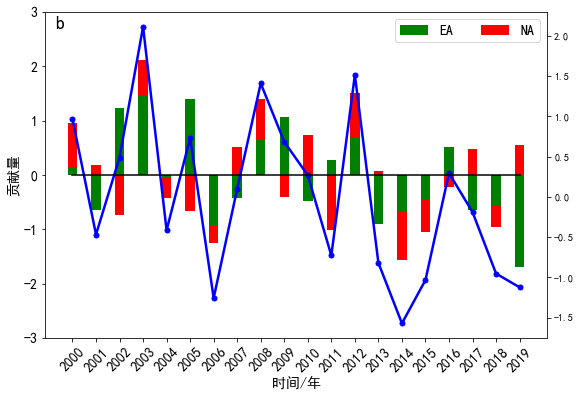

In [29]:
#  6666666666666666666666666666666 堆叠柱状图 折线图
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
# from matplotlib.pyplot import Multiplelocator
#条形图的绘制
year =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
       '2011','2012','2013','2014','2015','2016','2017','2018','2019']
width = 0.4 # 条形图的宽度  width: 柱形之间的宽度
plt.rcParams['figure.figsize'] = (9.0, 6.0)
fig = plt.figure()
ax = fig.add_subplot(111) 

data = np.array([dff3z['EA1'], dff3z['NA1']])
data_shape = np.shape(data)

def get_cumulated_array(data, **kwargs):
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]
    return d 

cumulated_data = get_cumulated_array(data, min=0)
cumulated_data_neg = get_cumulated_array(data, max=0)

row_mask = (data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data
cols = ["g", "r"]
labels=["EA","NA"]
for i in np.arange(0, data_shape[0]):
    ax.bar(np.arange(data_shape[1]),data[i],width, label=labels[i],bottom=data_stack[i], color=cols[i],)

# ax.bar(year, EA,width,label='EA',color='green')
# ax.bar(year,NA,width,bottom=men_means,label='NA',color='red')  # 这样虽然可以 但是对负的支持不好 
# # ax.bar(year,NA,width,label='NA',color='red')     # 这样虽然可以 但是正的会被掩埋  所以要采用别的方案
ax.set_ylim([-3, 3])   
ax.set_xlabel('时间/年',fontsize=14)
ax.set_ylabel('贡献量',fontsize=14)
ax.legend(loc="best",ncol=2,fontsize=14)  # EA NA 的大小

# # 画折线图 dff3z
ax2 = ax.twinx()  # 组合图必须加这个     
ax2.plot(year, dff3z['NH1'], 'b', ms=10, lw=2.5, marker='.') # 设置线粗细，节点样式  lw改变粗细  ms 转折点大小 
sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
y= ['0','0','0','0','0','0','0','0','0','0','0',
       '0','0','0','0','0','0','0','0','0']
ax3 = ax.twinx() 
ax3.plot(year,y, 'k')
plt.yticks([])  #去掉纵坐标值

# ax2.legend(["NH"],loc=(0.862,0.815),fontsize=13.6) # NH 的大小
ax.text(0.02,0.95,"b",transform=ax.transAxes, fontdict={'size': '18', 'color': 'k'})

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(14)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(14)
plt.savefig("E:/book/海洋湖沼通报/Dee1.png",format='png',dpi=500)
# plt.show()

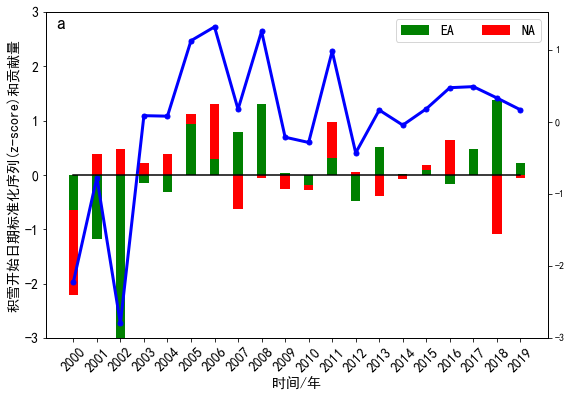

In [30]:
#  6666666666666666666666666666666 堆叠柱状图 折线图
import numpy as np
import matplotlib.pyplot as plt
#条形图的绘制
year =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
       '2011','2012','2013','2014','2015','2016','2017','2018','2019']
width = 0.4 # 条形图的宽度  width: 柱形之间的宽度
plt.rcParams['figure.figsize'] = (9.0, 6.0)
fig = plt.figure()
ax = fig.add_subplot(111) 

data = np.array([dff3z['EA2'], dff3z['NA2']])
data_shape = np.shape(data)

def get_cumulated_array(data, **kwargs):
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]
    return d 

cumulated_data = get_cumulated_array(data, min=0)
cumulated_data_neg = get_cumulated_array(data, max=0)

row_mask = (data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data
cols = ["g", "r"]
labels=["EA","NA"]
for i in np.arange(0, data_shape[0]):
    ax.bar(np.arange(data_shape[1]),data[i],width, label=labels[i],bottom=data_stack[i], color=cols[i],)

# ax.bar(year, EA,width,label='EA',color='green')
# ax.bar(year,NA,width,bottom=men_means,label='NA',color='red')  # 这样虽然可以 但是对负的支持不好 
# # ax.bar(year,NA,width,label='NA',color='red')     # 这样虽然可以 但是正的会被掩埋  所以要采用别的方案
ax.set_ylim([-3, 3])   
ax.set_xlabel('时间/年',fontsize=14)
ax.set_ylabel('积雪开始日期标准化序列(z-score)和贡献量',fontsize=14)
ax.legend(loc="best",ncol=2,fontsize=14)  # EA NA 的大小

# # 画折线图 dff3z
ax2 = ax.twinx()  # 组合图必须加这个     
ax2.plot(year, dff3z['NH2'], 'b', ms=10, lw=3, marker='.') # 设置线粗细，节点样式  lw改变粗细  ms 转折点大小 
# sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
y= ['0','0','0','0','0','0','0','0','0','0','0',
       '0','0','0','0','0','0','0','0','0']
ax3 = ax.twinx() 
ax3.plot(year,y, 'k')
plt.yticks([])  #去掉纵坐标值

# ax2.legend(["NH"],loc=(0.862,0.815),fontsize=13.6) # NH 的大小
ax.text(0.02,0.95,"a",transform=ax.transAxes, fontdict={'size': '18', 'color': 'k'})
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(14)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(14)
plt.savefig("E:/book/海洋湖沼通报/Doo1.png",format='png',dpi=500)
plt.show()

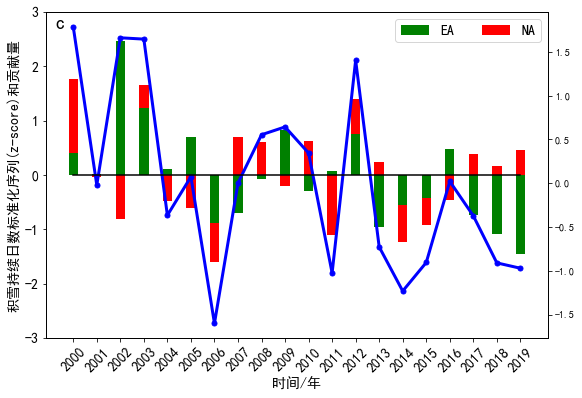

In [31]:
#  6666666666666666666666666666666 堆叠柱状图 折线图
import numpy as np
import matplotlib.pyplot as plt
#条形图的绘制
year =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
       '2011','2012','2013','2014','2015','2016','2017','2018','2019']
width = 0.4 # 条形图的宽度  width: 柱形之间的宽度
plt.rcParams['figure.figsize'] = (9.0, 6.0)
fig = plt.figure()
ax = fig.add_subplot(111) 

data = np.array([dff3z['Snow_Length_EA'], dff3z['Snow_Length_NA']])
data_shape = np.shape(data)

def get_cumulated_array(data, **kwargs):
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]
    return d 

cumulated_data = get_cumulated_array(data, min=0)
cumulated_data_neg = get_cumulated_array(data, max=0)

row_mask = (data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data
cols = ["g", "r"]
labels=["EA","NA"]
for i in np.arange(0, data_shape[0]):
    ax.bar(np.arange(data_shape[1]),data[i],width, label=labels[i],bottom=data_stack[i], color=cols[i],)

# ax.bar(year, EA,width,label='EA',color='green')
# ax.bar(year,NA,width,bottom=men_means,label='NA',color='red')  # 这样虽然可以 但是对负的支持不好 
# # ax.bar(year,NA,width,label='NA',color='red')     # 这样虽然可以 但是正的会被掩埋  所以要采用别的方案
ax.set_ylim([-3, 3])   
ax.set_xlabel('时间/年',fontsize=14)
ax.set_ylabel('积雪持续日数标准化序列(z-score)和贡献量',fontsize=14)
ax.legend(loc="best",ncol=2,fontsize=14)  # EA NA 的大小

# # 画折线图 dff3z
ax2 = ax.twinx()  # 组合图必须加这个     
ax2.plot(year, dff3z['Snow_Length_NH'], 'b', ms=10, lw=3, marker='.') # 设置线粗细，节点样式  lw改变粗细  ms 转折点大小 
# sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
y= ['0','0','0','0','0','0','0','0','0','0','0',
       '0','0','0','0','0','0','0','0','0']
ax3 = ax.twinx() 
ax3.plot(year,y, 'k')
plt.yticks([])  #去掉纵坐标值

# ax2.legend(["NH"],loc=(0.862,0.815),fontsize=13.6) # NH 的大小
ax.text(0.02,0.95,"c",transform=ax.transAxes, fontdict={'size': '18', 'color': 'k'})

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(14)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(14)
plt.savefig("E:/book/海洋湖沼通报/Ddd1.png",format='png',dpi=500)
plt.show()

In [32]:
# #  6666666666666666666666666666666 堆叠柱状图 折线图
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import datetime
# # from matplotlib.pyplot import Multiplelocator
# #条形图的绘制
# year =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
#        '2011','2012','2013','2014','2015','2016','2017','2018','2019']
# width = 0.4 # 条形图的宽度  width: 柱形之间的宽度
# plt.rcParams['figure.figsize'] = (9.0, 6.0)
# fig = plt.figure()
# ax = fig.add_subplot(111) 

# data = np.array([dff3z['EA1'], dff3z['NA1']])
# data_shape = np.shape(data)

# def get_cumulated_array(data, **kwargs):
#     cum = data.clip(**kwargs)
#     cum = np.cumsum(cum, axis=0)
#     d = np.zeros(np.shape(data))
#     d[1:] = cum[:-1]
#     return d 

# cumulated_data = get_cumulated_array(data, min=0)
# cumulated_data_neg = get_cumulated_array(data, max=0)

# row_mask = (data<0)
# cumulated_data[row_mask] = cumulated_data_neg[row_mask]
# data_stack = cumulated_data
# cols = ["g", "r"]
# labels=["EA","NA"]
# for i in np.arange(0, data_shape[0]):
#     ax.bar(np.arange(data_shape[1]),data[i],width, label=labels[i],bottom=data_stack[i], color=cols[i],)

# # ax.bar(year, EA,width,label='EA',color='green')
# # ax.bar(year,NA,width,bottom=men_means,label='NA',color='red')  # 这样虽然可以 但是对负的支持不好 
# # # ax.bar(year,NA,width,label='NA',color='red')     # 这样虽然可以 但是正的会被掩埋  所以要采用别的方案
# ax.set_ylim([-3, 3])   
# ax.set_xlabel('时间/年',fontsize=14)
# ax.set_ylabel('积雪结束日期标准化序列(z-score)和贡献量',fontsize=14)
# ax.legend(loc="best",ncol=2,fontsize=14)  # EA NA 的大小

# # # 画折线图 dff3z
# ax2 = ax.twinx()  # 组合图必须加这个     
# ax2.plot(year, dff3z['NH1'], 'b', ms=10, lw=2.5, marker='.') # 设置线粗细，节点样式  lw改变粗细  ms 转折点大小 
# sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
# y= ['0','0','0','0','0','0','0','0','0','0','0',
#        '0','0','0','0','0','0','0','0','0']
# ax3 = ax.twinx() 
# ax3.plot(year,y, 'k')
# plt.yticks([])  #去掉纵坐标值
# # ax2.legend(["NH"],loc=(0.532,0.905),fontsize=15) # NH 的大小
# ax2.legend(["NH"],loc=(0.862,0.815),fontsize=13.6) # NH 的大小
# ax2.text(0.02,0.95,"b",transform=ax.transAxes, fontdict={'size': '18', 'color': 'k'})

# for label in ax.xaxis.get_ticklabels():
#     label.set_rotation(45)
#     label.set_fontsize(14)
# for label in ax.yaxis.get_ticklabels():
#     label.set_fontsize(14)
# plt.savefig("E:/book/海洋湖沼通报/Dee1.png",format='png',dpi=500)
# plt.show()

In [33]:
# #  6666666666666666666666666666666 堆叠柱状图 折线图
# import numpy as np
# import matplotlib.pyplot as plt
# #条形图的绘制
# year =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
#        '2011','2012','2013','2014','2015','2016','2017','2018','2019']
# width = 0.4 # 条形图的宽度  width: 柱形之间的宽度
# plt.rcParams['figure.figsize'] = (9.0, 6.0)
# fig = plt.figure()
# ax = fig.add_subplot(111) 

# data = np.array([dff3z['EA2'], dff3z['NA2']])
# data_shape = np.shape(data)

# def get_cumulated_array(data, **kwargs):
#     cum = data.clip(**kwargs)
#     cum = np.cumsum(cum, axis=0)
#     d = np.zeros(np.shape(data))
#     d[1:] = cum[:-1]
#     return d 

# cumulated_data = get_cumulated_array(data, min=0)
# cumulated_data_neg = get_cumulated_array(data, max=0)

# row_mask = (data<0)
# cumulated_data[row_mask] = cumulated_data_neg[row_mask]
# data_stack = cumulated_data
# cols = ["g", "r"]
# labels=["EA","NA"]
# for i in np.arange(0, data_shape[0]):
#     ax.bar(np.arange(data_shape[1]),data[i],width, label=labels[i],bottom=data_stack[i], color=cols[i],)

# # ax.bar(year, EA,width,label='EA',color='green')
# # ax.bar(year,NA,width,bottom=men_means,label='NA',color='red')  # 这样虽然可以 但是对负的支持不好 
# # # ax.bar(year,NA,width,label='NA',color='red')     # 这样虽然可以 但是正的会被掩埋  所以要采用别的方案
# ax.set_ylim([-3, 3])   
# ax.set_xlabel('时间/年',fontsize=14)
# ax.set_ylabel('积雪开始日期标准化序列(z-score)和贡献量',fontsize=14)
# ax.legend(loc="best",ncol=2,fontsize=14)  # EA NA 的大小

# # # 画折线图 dff3z
# ax2 = ax.twinx()  # 组合图必须加这个     
# ax2.plot(year, dff3z['NH2'], 'b', ms=10, lw=3, marker='.') # 设置线粗细，节点样式  lw改变粗细  ms 转折点大小 
# # sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
# y= ['0','0','0','0','0','0','0','0','0','0','0',
#        '0','0','0','0','0','0','0','0','0']
# ax3 = ax.twinx() 
# ax3.plot(year,y, 'k')
# plt.yticks([])  #去掉纵坐标值
# # ax2.legend(["NH"],loc=(0.532,0.905),fontsize=15) # NH 的大小
# ax2.legend(["NH"],loc=(0.862,0.815),fontsize=13.6) # NH 的大小
# ax2.text(0.02,0.95,"a",transform=ax.transAxes, fontdict={'size': '18', 'color': 'k'})
# for label in ax.xaxis.get_ticklabels():
#     label.set_rotation(45)
#     label.set_fontsize(14)
# for label in ax.yaxis.get_ticklabels():
#     label.set_fontsize(14)
# plt.savefig("E:/book/海洋湖沼通报/Doo1.png",format='png',dpi=500)
# plt.show()

In [34]:
# #  6666666666666666666666666666666 堆叠柱状图 折线图
# import numpy as np
# import matplotlib.pyplot as plt
# #条形图的绘制
# year =['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
#        '2011','2012','2013','2014','2015','2016','2017','2018','2019']
# width = 0.4 # 条形图的宽度  width: 柱形之间的宽度
# plt.rcParams['figure.figsize'] = (9.0, 6.0)
# fig = plt.figure()
# ax = fig.add_subplot(111) 

# data = np.array([dff3z['Snow_Length_EA'], dff3z['Snow_Length_NA']])
# data_shape = np.shape(data)

# def get_cumulated_array(data, **kwargs):
#     cum = data.clip(**kwargs)
#     cum = np.cumsum(cum, axis=0)
#     d = np.zeros(np.shape(data))
#     d[1:] = cum[:-1]
#     return d 

# cumulated_data = get_cumulated_array(data, min=0)
# cumulated_data_neg = get_cumulated_array(data, max=0)

# row_mask = (data<0)
# cumulated_data[row_mask] = cumulated_data_neg[row_mask]
# data_stack = cumulated_data
# cols = ["g", "r"]
# labels=["EA","NA"]
# for i in np.arange(0, data_shape[0]):
#     ax.bar(np.arange(data_shape[1]),data[i],width, label=labels[i],bottom=data_stack[i], color=cols[i],)

# # ax.bar(year, EA,width,label='EA',color='green')
# # ax.bar(year,NA,width,bottom=men_means,label='NA',color='red')  # 这样虽然可以 但是对负的支持不好 
# # # ax.bar(year,NA,width,label='NA',color='red')     # 这样虽然可以 但是正的会被掩埋  所以要采用别的方案
# ax.set_ylim([-3, 3])   
# ax.set_xlabel('时间/年',fontsize=14)
# ax.set_ylabel('积雪持续日数标准化序列(z-score)和贡献量',fontsize=14)
# ax.legend(loc="best",ncol=2,fontsize=14)  # EA NA 的大小

# # # 画折线图 dff3z
# ax2 = ax.twinx()  # 组合图必须加这个     
# ax2.plot(year, dff3z['Snow_Length_NH'], 'b', ms=10, lw=3, marker='.') # 设置线粗细，节点样式  lw改变粗细  ms 转折点大小 
# # sns.despine(left=True, bottom=True)   # 删除坐标轴，默认删除右上
# y= ['0','0','0','0','0','0','0','0','0','0','0',
#        '0','0','0','0','0','0','0','0','0']
# ax3 = ax.twinx() 
# ax3.plot(year,y, 'k')
# plt.yticks([])  #去掉纵坐标值
# # ax2.legend(["NH"],loc=(0.532,0.905),fontsize=15) # NH 的大小
# ax2.legend(["NH"],loc=(0.862,0.815),fontsize=13.6) # NH 的大小
# ax2.text(0.02,0.95,"c",transform=ax.transAxes, fontdict={'size': '18', 'color': 'k'})

# for label in ax.xaxis.get_ticklabels():
#     label.set_rotation(45)
#     label.set_fontsize(14)
# for label in ax.yaxis.get_ticklabels():
#     label.set_fontsize(14)
# plt.savefig("E:/book/海洋湖沼通报/Ddd1.png",format='png',dpi=500)
# plt.show()

 接下来要做的  包括一个那个地区的百分比  <font color='red'>都有面积所占百分比 可以分类后求出所占比例</font>
文章中肯定要写P值的  还有就是阿尔法的置信度 置信区间什么的
还有考虑senls slope 什么的
类似的维度问题
每向北移动10°时，地区平均积雪覆盖天数增加约10周


关于SCP 以及 那个置信度水平的书写
**2001年至2014年，来自多颗卫星和再分析数据的证据表明，高纬度北部地区的降雪结束日期(De)提前了5.11天（±2.20）(52-7天 5°N)，并在北中纬度地区(32-52°N)以90%的可信度水平延迟了3.28天（±2.59）天。**由于De的变化，雪持续天数(Dd)的持续时间缩短了5.57（±2.55） 高纬度地区的白天，中纬度地区更长9.74天（±2.58）天。

**Observed contrast changes in** **snow cover phenology in northern** **middle and high latitudes from** 2001–2014 

Satellite observed changes in the Northern Hemisphere snow cover phenology and the associated radiative forcing and feedback between 1982 and 2013 
这两个主要是写SCP的 第二个还写了SCE

**Distribution and Attribution of Terrestrial Snow Cover****Phenology Changes over the Northern Hemisphere****during 2001****–****2020**



- 如果 P<0.01，说明是**较强**的判定结果，拒绝假定的参数取值。
- 如果 0.01<P值<0.05，说明**较弱的判定结果**，拒接假定的参数取值。
- 如果 P值>0.05，说明结果更倾向于接受假定的参数取值。  
结果 0.05≥P>0.01被认为是具有统计学意义，而0.01≥P≥0.001被认为具有高度统计学意义。
可信区间介绍：按一定的概率或可信度(1-α)用一个区间来估计总体参数所在的范围，该范围通常称为参数的可信区间或者置信区间(confidenceinterval,CI),预先给定的概率(1-α)称为可信度或者置信度(confidencelevel),常取95%或99%。
###  结合P与阿尔法
0.05的p值通常被认为是可接受错误的边界水平。 就是95%呗
关于P值

### 可以适当的涉及一些温度的 SCF在秋冬季的时空分布与过去20年里观察到的积雪面积的增加和广泛的北方冬季降温相吻合

大多数像素的表现都在95%的显著水平。

SCE 
**北美的下降趋势比欧亚大陆大**   <font color='red'>这也是作为SCE的一个结论 。</font>
**北美、北美和欧亚大陆在1972-2006**年期间每周有强烈的负面趋势。最大的下降发生在北美和美国的春季 在较小的程度上，

SCP

### 还有关于图片的处理比如是哪个图片合为一个图片  应该利用PS来制作

### 看看MK 的 Snow cover variations across China from 1952-2012   中mk的可解释性

<font color='red'>我做的SCD 其实就是SCF</font>  因为SCF 就是snow  cover days  除以的年份


使用Kendall估计代替最小二乘法，


<font color='red'>SCE异常也是导致了SCP的异常。</font>